In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 644.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving programmers2023.csv to programmers2023.csv


In [4]:
import pandas as pd

alumnos = pd.read_csv("programmers2023.csv", encoding='utf-8')

In [5]:
alumnos.head()

,gender,delay,disability,number_of_children,family_economic_contribution,studies_achieved_by_the_mother,studies_achieved_by_the_father,a_day,Algebra_and_Geometry,Computer_Architecture,Operating_Systems,Algorithms_and_Data_Structure,Information_Systems,Mathematical_Analysis,Chemistry,Programming,Numerical_calculation
0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,1,0,0,1,1,1,0,1,1,1,1,0,1,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
import pycaret

In [7]:
from pycaret.classification import *
exp1 = setup(alumnos, target = 'a_day')

,Description,Value
0,Session id,3622
1,Target,a_day
2,Target type,Binary
3,Original data shape,"(388, 17)"
4,Transformed data shape,"(388, 17)"
5,Transformed train set shape,"(271, 17)"
6,Transformed test set shape,"(117, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9926,1.0000,0.9750,1.0000,0.9857,0.9809,0.9824,0.4570
et,Extra Trees Classifier,0.9926,1.0000,0.9750,1.0000,0.9857,0.9809,0.9824,0.1630
dt,Decision Tree Classifier,0.9889,0.9812,0.9625,1.0000,0.9769,0.9701,0.9735,0.0480
ada,Ada Boost Classifier,0.9889,0.9928,0.9625,1.0000,0.9769,0.9701,0.9735,0.1240
gbc,Gradient Boosting Classifier,0.9889,0.9812,0.9625,1.0000,0.9769,0.9701,0.9735,0.1260
xgboost,Extreme Gradient Boosting,0.9889,0.9993,0.9625,1.0000,0.9769,0.9701,0.9735,0.0730
lightgbm,Light Gradient Boosting Machine,0.9889,0.9993,0.9625,1.0000,0.9769,0.9701,0.9735,0.2410
knn,K Neighbors Classifier,0.9705,0.9906,0.9292,0.9800,0.9474,0.9275,0.9336,0.0400
svm,SVM - Linear Kernel,0.9595,0.9952,0.9403,0.9356,0.9312,0.9029,0.9088,0.0530
ridge,Ridge Classifier,0.9558,0.9957,0.8931,0.9653,0.9252,0.8940,0.8976,0.0510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


In [11]:
import shap

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9934,0.6250,1.0000,0.7692,0.7011,0.7347
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

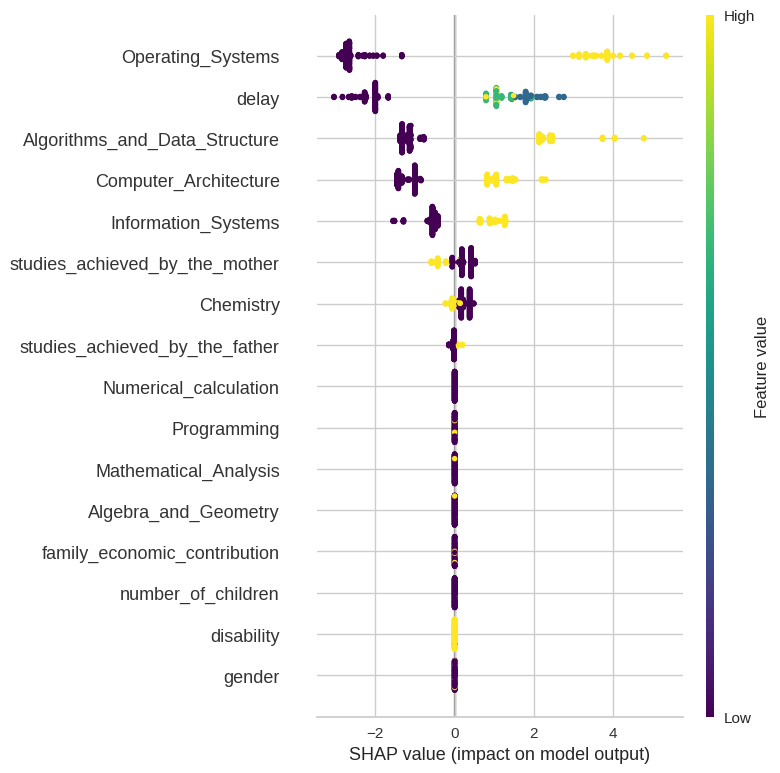

In [12]:
# Visualizar las explicaciones

xg = create_model('xgboost')

# Obtener las explicaciones de SHAP
explainer = shap.Explainer(xg)
shap_values = explainer(alumnos.drop('a_day', axis=1))

# Visualizar las explicaciones
shap.summary_plot(shap_values, alumnos.drop('a_day', axis=1), cmap='viridis')